### aim: 

### date: 

In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## Experiment 2, NCEP salinity and biofeedback 

In [16]:
scncep = {
    
    ######
    
    'GA01': {
        'name': 'GA01: NCEP DW2022 - dyn \n biofeedback: ON, SR: OFF',
        'linestyle':'-',
        'color':'b',
        'runid':'TOM12_DW_GA01'},
    'GC01': {
        'name': 'GC01: NCEP DW2022 - bias 1990  \n biofeedback: ON, SR: OFF',
        'linestyle':'--',
        'color':'b',
        'runid':'TOM12_DW_GC01'},    
    
    ######
    
    'GNA2': {
        'name': 'GNA2: NCEP CAL12 dyn \n  biofeedback: OFF, SR: ON',
        'linestyle':'-',
        'color':'k',
        'runid':'TOM12_TJ_GNA2'},    
    'GNCB': {
        'name': 'GNCB: NCEP CAL12 bias 1990 \n biofeedback: OFF, SR: ON',
        'linestyle':'--',
        'color':'k',
        'runid':'TOM12_TJ_GNCB'},  
    
    ######
    
    'GNAW': {
        'name': 'GNAW: NCEP CAL12 dyn \n  biofeedback: OFF, SR: OFF',
        'linestyle':'-',
        'color':'grey',
        'runid':'TOM12_TJ_GNAW'},    
    'GNCW': {
        'name': 'GNCW: NCEP CAL12 bias 1990 \n biofeedback: OFF, SR: OFF',
        'linestyle':'--',
        'color':'grey',
        'runid':'TOM12_TJ_GNCW'},  
    
    ######
    
    'GNAP': {
        'name': 'GNAP: NCEP CAL12- dyn \n biofeedback: ON, SR: ON',
        'linestyle':'-',
        'color':'green',
        'runid':'TOM12_TJ_GNAP'},    
    'GNCP': {
        'name': 'GNCP: NCEP CAL12- bias 1990 \n biofeedback: ON, SR: ON',
        'linestyle':'--',
        'color':'green',
        'runid':'TOM12_TJ_GNCP'},   
    
     ######
    
    'GNAY': {
        'name': 'GNAY: NCEP CAL12- dyn \n biofeedback: ON, SR: OFF',
        'linestyle':'-',
        'color':'lightgreen',
        'runid':'TOM12_TJ_GNAY'},    
    'GNCY': {
        'name': 'GNCY: NCEP CAL12- bias 1990 \n biofeedback: ON, SR: OFF',
        'linestyle':'--',
        'color':'lightgreen',
        'runid':'TOM12_TJ_GNCY'},    


}



In [17]:
sy = 1948
ey = 1997

In [18]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir ='/gpfs/home/mep22dku/scratch/SOZONE/GRO2_FORCING_EXPERIMENT/NCEP-ERA-physics-comparison/extracted/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}-{dtype}-{yrs[i]}.nc'

        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


def plotncep_seas(tsc, tvar, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):
#     scens = ['GEA3','GEC2','GECB','GNA2','GNC2','GNCB','GA01','GC01','RVA0','RVC0']
#     for s in range(0,10):

    tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))


    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tds[tvar].sel(lat_band = 6).groupby('time_counter.year').mean()*factor,
                   color = scncep[tsc]['color'], \
                  linestyle = scncep[tsc]['linestyle'], label = scncep[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    
    
def plotncep_tadic(tsc, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):

    
    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
        
    tadic = (tds['surfTA'].sel(lat_band = 6).groupby('time_counter.year').mean()-\
        tds['surfDIC'].sel(lat_band = 6).groupby('time_counter.year').mean())*1e6

    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tadic,
                   color = scncep[tsc]['color'], \
                  linestyle = scncep[tsc]['linestyle'], label = scncep[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    
def plotncep_seas_diff(tsc, tsc2, tvar, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):
#     scens = ['GEA3','GEC2','GECB','GNA2','GNC2','GNCB','GA01','GC01','RVA0','RVC0']
#     for s in range(0,10):

    tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))


    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc2]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc2]['runid']))
        tds2 = tds2.sel(time_counter=(tds2['time_counter.season'] == seas))
        
    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tds[tvar].sel(lat_band = 6).groupby('time_counter.year').mean()*factor-\
                  tds2[tvar].sel(lat_band = 6).groupby('time_counter.year').mean()*factor,
                   color = scncep[tsc]['color'], \
                  linestyle = scncep[tsc]['linestyle'], label = scncep[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    
    
def plotncep_tadic_diff(tsc, tsc2, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):

    
    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc2]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scncep[tsc2]['runid']))
        tds2 = tds2.sel(time_counter=(tds2['time_counter.season'] == seas))
        
        
        
    tadic = (tds['surfTA'].sel(lat_band = 6).groupby('time_counter.year').mean()-\
        tds['surfDIC'].sel(lat_band = 6).groupby('time_counter.year').mean())*1e6
    tadic2 = (tds2['surfTA'].sel(lat_band = 6).groupby('time_counter.year').mean()-\
        tds2['surfDIC'].sel(lat_band = 6).groupby('time_counter.year').mean())*1e6
    
    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tadic-tadic2,
                   color = scncep[tsc]['color'], \
                  linestyle = scncep[tsc]['linestyle'], label = scncep[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


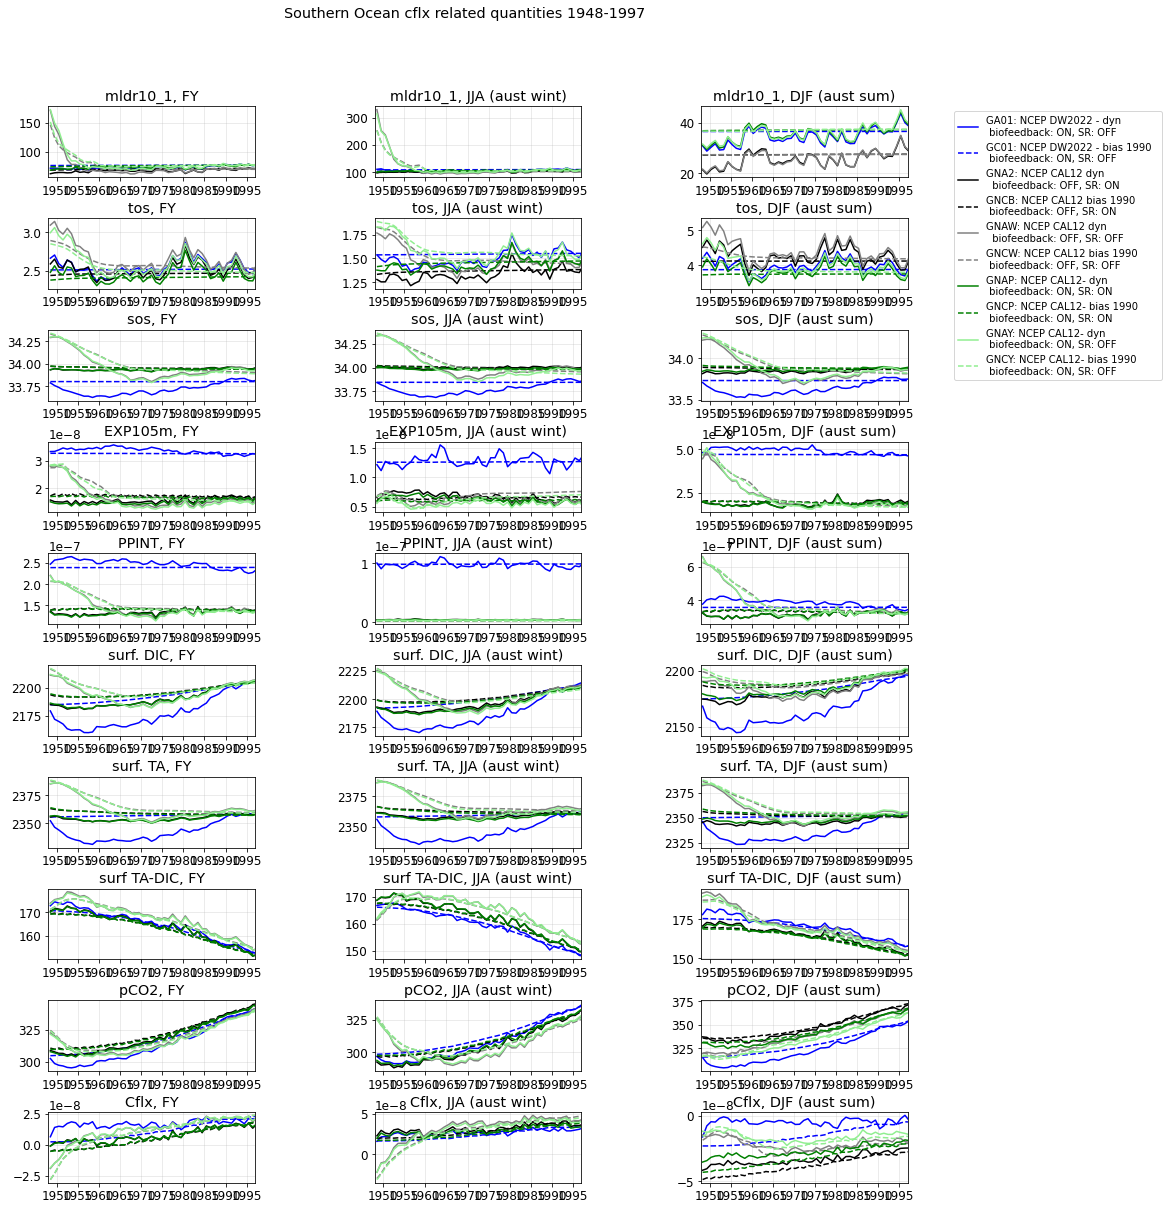

In [19]:
fact = 1.1
fig, axs = plt.subplots(10,3, figsize=(14*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scens = ['GNAP','GNA2','GA01']
scens = ['GA01','GC01','GNA2','GNCB','GNAW','GNCW','GNAP','GNCP','GNAY','GNCY']

for s in range(0,len(scens)):
    plotncep_seas(scens[s],'mldr10_1',0,'gridT',sy,ey,'FY')
    plotncep_seas(scens[s],'mldr10_1',1,'gridT',sy,ey,'JJA')
    plotncep_seas(scens[s],'mldr10_1',2,'gridT',sy,ey,'DJF')
    
    ofs = 3; tvar = 'tos'
    plotncep_seas(scens[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotncep_seas(scens[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotncep_seas(scens[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
   
    ofs = 6; tvar = 'sos'
    plotncep_seas(scens[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotncep_seas(scens[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotncep_seas(scens[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
    
    ofs = 9; tvar = 'EXP105m'
    plotncep_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 12; tvar = 'PPINT'
    plotncep_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 15; tvar = 'surfDIC'
    plotncep_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotncep_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotncep_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)

    ofs = 18; tvar = 'surfTA'
    plotncep_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotncep_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotncep_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)
    
    ofs = 21; 
    plotncep_tadic(scens[s],0+ofs,'diadT',sy,ey,'FY',1)
    plotncep_tadic(scens[s],1+ofs,'diadT',sy,ey,'JJA',1)
    plotncep_tadic(scens[s],2+ofs,'diadT',sy,ey,'DJF',1)    
    
    ofs = 24; tvar = 'pCO2'
    plotncep_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')    
    
    ofs = 27; tvar = 'Cflx'
    plotncep_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
vars = ['mldr10_1','tos','sos','EXP105m','PPINT','surf. DIC','surf. TA','surf TA-DIC','pCO2','Cflx']

for i in range(0,10):
    
    axs[i*3].set_title(f'{vars[i]}, FY')
    axs[i*3+1].set_title(f'{vars[i]}, JJA (aust wint)')
    axs[i*3+2].set_title(f'{vars[i]}, DJF (aust sum)')
    
for i in range(0,30):
#     axs[i].set_xlim([sy,2020])
#     axs[i].set_xticks(np.arange(sy,2040,20))
    axs[i].set_xlim([datetime(sy, 1, 1), datetime(ey, 1, 1)])
    #axs[i].set_xticks(fontsize = 8)

    axs[i].grid(alpha = 0.3)
fig.suptitle(f'Southern Ocean cflx related quantities {sy}-{ey}', y = 0.95)
plt.subplots_adjust(hspace = 0.58 )
plt.subplots_adjust(wspace = 0.58 )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


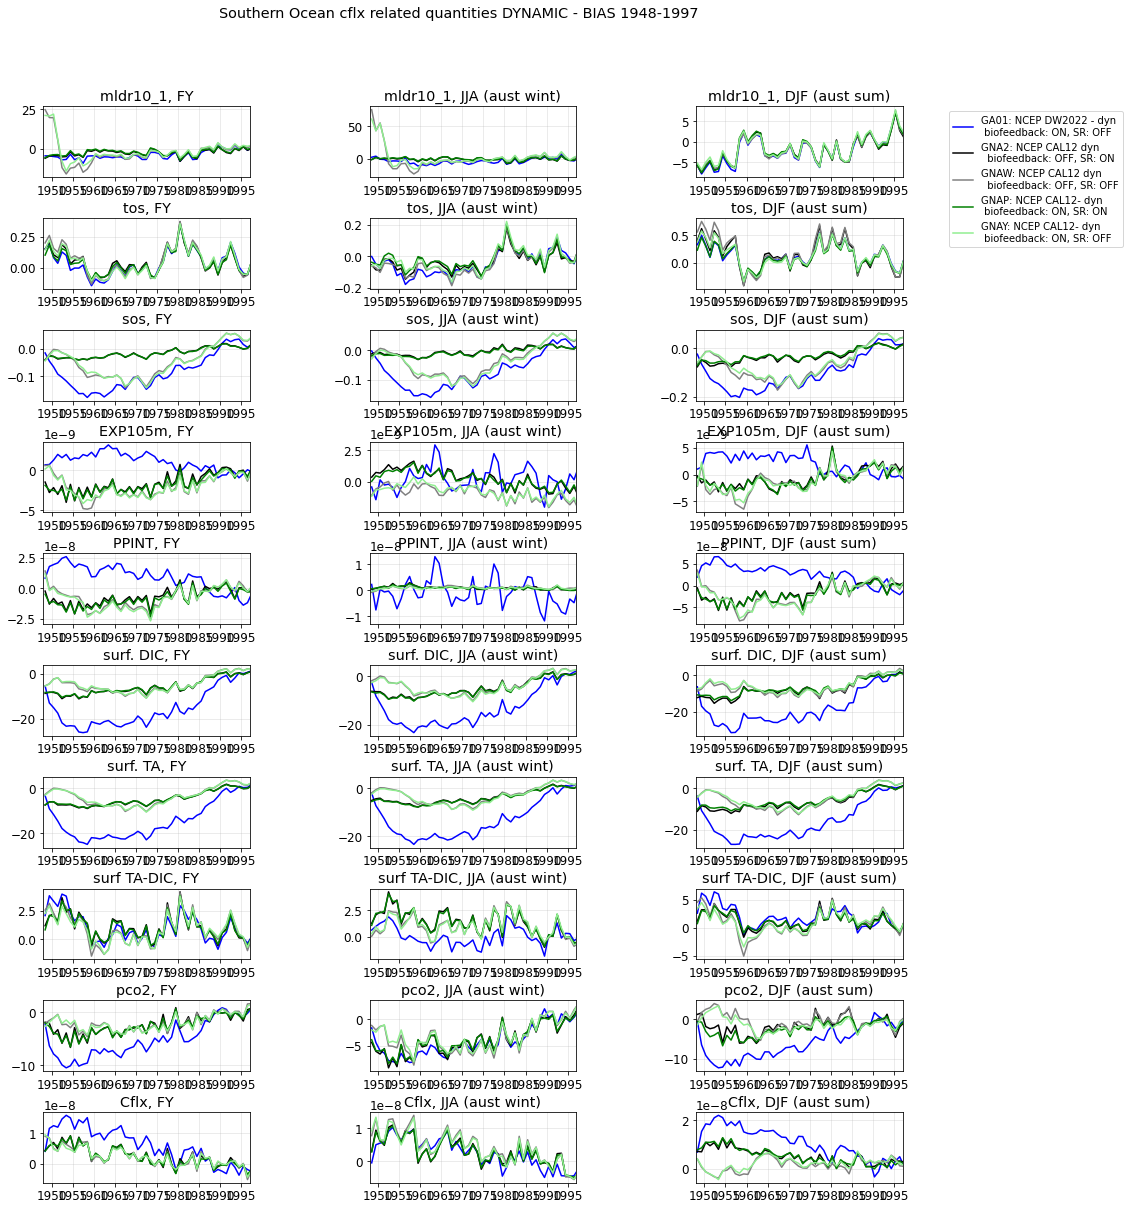

In [20]:
fact = 1.1
fig, axs = plt.subplots(10,3, figsize=(14*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


scens = ['GNAP','GNA2','GA01']
scens = ['GA01','GNA2','GNAW','GNAP','GNAY']
scensC = ['GC01','GNCB','GNCW','GNCP','GNCY']

for s in range(0,len(scens)):
    plotncep_seas_diff(scens[s],scensC[s],'mldr10_1',0,'gridT',sy,ey,'FY')
    plotncep_seas_diff(scens[s],scensC[s],'mldr10_1',1,'gridT',sy,ey,'JJA')
    plotncep_seas_diff(scens[s],scensC[s],'mldr10_1',2,'gridT',sy,ey,'DJF')
    
    ofs = 3; tvar = 'tos'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
   
    ofs = 6; tvar = 'sos'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
    
    ofs = 9; tvar = 'EXP105m'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 12; tvar = 'PPINT'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 15; tvar = 'surfDIC'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)

    ofs = 18; tvar = 'surfTA'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)
    
    ofs = 21; 
    plotncep_tadic_diff(scens[s],scensC[s],0+ofs,'diadT',sy,ey,'FY',1)
    plotncep_tadic_diff(scens[s],scensC[s],1+ofs,'diadT',sy,ey,'JJA',1)
    plotncep_tadic_diff(scens[s],scensC[s],2+ofs,'diadT',sy,ey,'DJF',1)    
    
    ofs = 24; tvar = 'pCO2'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')    
    
    ofs = 27; tvar = 'Cflx'
    plotncep_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotncep_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotncep_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
vars = ['mldr10_1','tos','sos','EXP105m','PPINT','surf. DIC','surf. TA','surf TA-DIC','pco2','Cflx']

for i in range(0,10):
    
    axs[i*3].set_title(f'{vars[i]}, FY')
    axs[i*3+1].set_title(f'{vars[i]}, JJA (aust wint)')
    axs[i*3+2].set_title(f'{vars[i]}, DJF (aust sum)')
    
for i in range(0,30):
#     axs[i].set_xlim([sy,2020])
#     axs[i].set_xticks(np.arange(sy,2040,20))
    axs[i].set_xlim([datetime(sy, 1, 1), datetime(ey, 1, 1)])
    #axs[i].set_xticks(fontsize = 8)

    axs[i].grid(alpha = 0.3)
fig.suptitle(f'Southern Ocean cflx related quantities DYNAMIC - BIAS {sy}-{ey}', y = 0.95)
plt.subplots_adjust(hspace = 0.58 )
plt.subplots_adjust(wspace = 0.58 )

## extract quantities for plotting here


In [21]:
sy = 1970; ey = 1998
extract = False
if extract:
    
    regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

    regdict = {'ARCTIC' : {'number' : 0.5},
               'P1' : {'number': 1.0},
              'P2' : {'number': 1.2},
               'P3' : {'number': 1.4},
               'P4' : {'number': 1.6},
               'P5' : {'number': 1.8},
                'A1' : {'number': 2.4},
              'A2' : {'number': 2.6},
               'A3' : {'number': 2.8},
               'A4' : {'number': 3},
               'A5' : {'number': 3.2},
               'I3' : {'number': 3.6},
               'I4' : {'number': 3.8},
               'I5' : {'number': 4},

              }

    tics = []
    tcm = 'Spectral'
    tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

    maskno = np.zeros([149,182])
    for i in range(0, len(regs)):
        maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
        tics.append(regdict[regs[i]]['number'])
    maskno[maskno == 0] = np.nan

    mask_latbands = np.copy(maskno)

    mask_latbands[maskno == 0.5] = 1
    mask_latbands[(maskno == 1) | (maskno == 2.4)] = 2
    mask_latbands[(maskno == 1.2) | (maskno == 2.6)] = 3
    mask_latbands[(maskno == 1.4) | (maskno == 2.8) | (maskno == 3.6)] = 4
    mask_latbands[(maskno == 1.6) | (maskno == 3.0) | (maskno == 3.8)] = 5
    mask_latbands[(maskno == 1.8) | (maskno == 3.2) | (maskno == 4.0)] = 6

    #####
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

    csize_broad = np.zeros([31,149,182])
    for i in range(0,31):
        csize_broad[i,:,:] = tmesh['csize'].values
    cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

    cdepth = tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]
    cdepth_broad = np.zeros([12,31,149,182])
    for i in range(0,12):
        cdepth_broad[i,:,:,:] = cdepth

    def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/afm/greenocean/software/runs'):
        yrs = np.arange(yrst,yrend+1,1)
        ylist = []
        for i in range(0,len(yrs)):
            ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'

            t2 = glob.glob(ty)
            print(t2)
            ylist.append(t2[0])
        return ylist

    def gimme_var(ds, var):
        '''
        takes ds of type grid, calculates seasonal by-lat 1-d tracers (tos, sos, lmdr10_1.
        '''
        seas_lat_var = np.zeros([12,6]) #storage array
        #print(ds[plant].long_name)
        tmn = ds[var] #.groupby('time_counter.season').mean('time_counter') #get seasonal mean1
        tmesh['csize'] = tmesh.tmask[0,0,:,:] #* tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
        tmn_molm2 = tmn*tmesh.csize #just 0,1
        #tmn_molm2 = np.nansum(tmn_test, axis = 1) #integrate, ie sum

        for s in range(0,12):        
            for b in range(0,6):
                tmn_molm2_formask = np.copy(tmn_molm2) #copy for manipulations
                tmn_molm2_formask_tseas = tmn_molm2_formask[s,:,:] # 
                tmn_molm2_formask_tseas[mask_latbands != b+1] = 0
                csize_formask = np.copy(csize_broad[0,:,:])
                csize_formask[mask_latbands != b+1] = 0
                seas_lat_var[s,b] = np.ma.average(tmn_molm2_formask_tseas[:,:], weights=csize_formask)

        return seas_lat_var

    def make_tracer_seas_lat_gridT(yrst, tr, baseDir = '/gpfs/afm/greenocean/software/runs/'):

        tdir = '/gpfs/home/mep22dku/scratch/SOZONE/GRO2_FORCING_EXPERIMENT/NCEP-ERA-physics-comparison/extracted/'
        tnam1 = f'{tr}-gridT-{yrst}.nc'
        tnam = f'{tdir}{tr}-gridT-{yrst}.nc'
        print(tnam1)

        dtype = 'grid_T'
        #baseDir = '/gpfs/afm/greenocean/software/runs/'
        yrend = yrst #
        ylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
        print(ylist)
        ds = xr.open_dataset(ylist[0])

        times = pd.date_range(f"{yrst}/01/01",f"{yrst+1}/01/01",freq='MS',closed='left')

        seas_lat_tos = gimme_var(ds, 'tos')
        seas_lat_sos = gimme_var(ds, 'sos')
        seas_lat_mldr10_1 = gimme_var(ds, 'mldr10_1')

        data_vars = {
    #                     'Alkalini':(['time_counter',  'lat_band'], seas_lat_Alkalini,
    #                  {'units': 'mol/m2'}),

                     'sos':(['time_counter',  'lat_band'], seas_lat_sos,
                     {'units': 'g/kg'}),
                     'tos':(['time_counter',  'lat_band'], seas_lat_tos,
                     {'units': 'degC'}),
                     'mldr10_1':(['time_counter',  'lat_band'], seas_lat_mldr10_1,
                     {'units': 'm'}),        

                    }

        # define coordinates
        coords = {'time_counter': (['time_counter'], times),\
                 'lat_band': (['lat_band'], np.arange(1,7,1)),}

        # define global attributes
        attrs = {'made in':'SOZONE/GRO2_FORCING_EXPERIMENT/NCEP-ERA-physics-comparison/extracter-mld-sst-tos.ipynb',
                 'latitude bands': 'see notebook, 1 is arctic, 6 is SO',
                }

    #     # create dataset
        ds2 = xr.Dataset(data_vars=data_vars,
                        coords=coords,
                        attrs=attrs)

        ds2.to_netcdf(f'{tnam}')

    def gimme_var_lev(ds, var, lev = 0):
        '''
        takes ds of type grid, calculates seasonal by-lat 1-d tracers (tos, sos, lmdr10_1.
        '''
        seas_lat_var = np.zeros([12,6]) #storage array
        #print(ds[plant].long_name)
        tmn = ds[var][:,lev,:,:] #.groupby('time_counter.season').mean('time_counter') #get seasonal mean1
        tmesh['csize'] = tmesh.tmask[0,0,:,:] #* tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
        tmn_molm2 = tmn*tmesh.csize #just 0,1
        #tmn_molm2 = np.nansum(tmn_test, axis = 1) #integrate, ie sum

        for s in range(0,12):        
            for b in range(0,6):
                tmn_molm2_formask = np.copy(tmn_molm2) #copy for manipulations
                tmn_molm2_formask_tseas = tmn_molm2_formask[s,:,:] # 
                tmn_molm2_formask_tseas[mask_latbands != b+1] = 0
                csize_formask = np.copy(csize_broad[0,:,:])
                csize_formask[mask_latbands != b+1] = 0
                seas_lat_var[s,b] = np.ma.average(tmn_molm2_formask_tseas[:,:], weights=csize_formask)

        return seas_lat_var

    def make_tracer_seas_lat_diadT(yrst, tr, baseDir = '/gpfs/afm/greenocean/software/runs/'):

        tdir = '/gpfs/home/mep22dku/scratch/SOZONE/GRO2_FORCING_EXPERIMENT/NCEP-ERA-physics-comparison/extracted/'
        tnam1 = f'{tr}-diadT-{yrst}.nc'
        tnam = f'{tdir}{tr}-diadT-{yrst}.nc'
        print(tnam1)

        dtype = 'diad_T'
        #baseDir = '/gpfs/afm/greenocean/software/runs/'
        yrend = yrst #
        ylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
        print(ylist)

        ds = xr.open_dataset(ylist[0])

        times = pd.date_range(f"{yrst}/01/01",f"{yrst+1}/01/01",freq='MS',closed='left')

        seas_lat_tos = gimme_var(ds, 'Cflx')
        seas_lat_sos = gimme_var(ds, 'pCO2')
        seas_lat_mldr10_1 = gimme_var(ds, 'PPINT')
        seas_lat_EXP = gimme_var_lev(ds,'EXP',10)

        dtype = 'ptrc_T'
        #baseDir = '/gpfs/afm/greenocean/software/runs/'
        yrend = yrst #
        ylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
        ds = xr.open_dataset(ylist[0])

        times = pd.date_range(f"{yrst}/01/01",f"{yrst+1}/01/01",freq='MS',closed='left')

        seas_lat_DIC = gimme_var_lev(ds, 'DIC')
        seas_lat_Alkalini = gimme_var_lev(ds, 'Alkalini')


        data_vars = {
    #                     'Alkalini':(['time_counter',  'lat_band'], seas_lat_Alkalini,
    #                  {'units': 'mol/m2'}),

                     'pCO2':(['time_counter',  'lat_band'], seas_lat_sos,
                     {'units': 'uatm'}),
                     'Cflx':(['time_counter',  'lat_band'], seas_lat_tos,
                     {'units': 'mol/m2/s'}),
                     'PPINT':(['time_counter',  'lat_band'], seas_lat_mldr10_1,
                     {'units': 'mol/m2/s'}),       
                     'EXP105m':(['time_counter',  'lat_band'], seas_lat_EXP,
                     {'units': 'mol/m2/s'}), 
                     'surfDIC':(['time_counter',  'lat_band'], seas_lat_DIC,
                     {'units': 'mol/m3'}), 
                     'surfTA':(['time_counter',  'lat_band'], seas_lat_Alkalini,
                     {'units': 'mol/m3'}),         
                    }

        # define coordinates
        coords = {'time_counter': (['time_counter'], times),\
                 'lat_band': (['lat_band'], np.arange(1,7,1)),}

        # define global attributes
        attrs = {'made in':'SOZONE/GRO2_FORCING_EXPERIMENT/NCEP-ERA-physics-comparison/extracter-mld-sst-tos.ipynb',
                 'latitude bands': 'see notebook, 1 is arctic, 6 is SO',
                }

    #     # create dataset
        ds2 = xr.Dataset(data_vars=data_vars,
                        coords=coords,
                        attrs=attrs)

        ds2.to_netcdf(f'{tnam}')



        
    for i in range(sy,ey):
        
#         make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNA2')
#         make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNA2')

#         make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GEA3')
#         make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GEA3')

#         make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GEC2')
#         make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GEC2')

#         make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNC2')
#         make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNC2')
        
#         make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNCB')
#         make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNCB')

#         make_tracer_seas_lat_diadT(i, 'TOM12_DW_GA01')
#         make_tracer_seas_lat_gridT(i, 'TOM12_DW_GA01')
        
#         make_tracer_seas_lat_diadT(i, 'TOM12_DW_GC01')
#         make_tracer_seas_lat_gridT(i, 'TOM12_DW_GC01')

#         make_tracer_seas_lat_diadT(i, 'TOM12_TJ_RVA0')
#         make_tracer_seas_lat_gridT(i, 'TOM12_TJ_RVA0')
        
#         make_tracer_seas_lat_diadT(i, 'TOM12_TJ_RVC0')
#         make_tracer_seas_lat_gridT(i, 'TOM12_TJ_RVC0')


        make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNAP')
        make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNAP')

        make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNCW')
        make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNCW')
        
        make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNAW')
        make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNAW')
        

        make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNCY')
        make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNCY')
        
        make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNAY')
        make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNAY')
        
        make_tracer_seas_lat_diadT(i, 'TOM12_TJ_GNCP')
        make_tracer_seas_lat_gridT(i, 'TOM12_TJ_GNCP')

## NCEP-ERA comparison

In [22]:
scorig = {
    'GEA3': {
        'name': 'GEA3: ERA CAL12- dyn \n biofeedback: OFF, SR: ON',
        'linestyle':'-',
        'color':'r',
        'runid':'TOM12_TJ_GEA3'},

    'GECB': {
        'name': 'ERA CAL12- bias 1990 \n biofeedback: OFF, SR: ON',
        'linestyle':'--',
        'color':'r',
        'runid':'TOM12_TJ_GECB'},
    
    'GNA2': {
        'name': 'NCEP CAL12- dyn \n biofeedback: OFF, SR: ON',
        'linestyle':'-',
        'color':'k',
        'runid':'TOM12_TJ_GNA2'},    

    'GNCB': {
        'name': 'NCEP CAL12- bias 1990 \n biofeedback: OFF, SR: ON',
        'linestyle':'--',
        'color':'k',
        'runid':'TOM12_TJ_GNCB'},  
    
    'GA01': {
        'name': 'GA01: NCEP DW2022 - dyn \n biofeedback: ON, SR: OFF',
        'linestyle':'-',
        'color':'b',
        'runid':'TOM12_DW_GA01'},
    'GC01': {
        'name': 'GC01: NCEP DW2022 - bias 1990 \n biofeedback: ON, SR: OFF',
        'linestyle':'--',
        'color':'b',
        'runid':'TOM12_DW_GC01'},    
    'RVA0': {
        'name': 'RVA0: ERA RIV12(GCB23) - dyn \n biofeedback: OFF, SR: ON',
        'linestyle':'-',
        'color':'y',
        'runid':'TOM12_TJ_RVA0'},
    'RVC0': {
        'name': 'RVC0: ERA RIV12(GCB23) - bias 1990 \n biofeedback: OFF, SR: ON',
        'linestyle':'--',
        'color':'y',
        'runid':'TOM12_TJ_RVC0'},    
    
}



In [23]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir ='/gpfs/home/mep22dku/scratch/SOZONE/GRO2_FORCING_EXPERIMENT/NCEP-ERA-physics-comparison/extracted/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}-{dtype}-{yrs[i]}.nc'

        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


def plotorig_seas(tsc, tvar, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):
#     scens = ['GEA3','GEC2','GECB','GNA2','GNC2','GNCB','GA01','GC01','RVA0','RVC0']
#     for s in range(0,10):

    tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))


    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tds[tvar].sel(lat_band = 6).groupby('time_counter.year').mean()*factor,
                   color = scorig[tsc]['color'], \
                  linestyle = scorig[tsc]['linestyle'], label = scorig[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    
    
def plotorig_tadic(tsc, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):

    
    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
        
    tadic = (tds['surfTA'].sel(lat_band = 6).groupby('time_counter.year').mean()-\
        tds['surfDIC'].sel(lat_band = 6).groupby('time_counter.year').mean())*1e6

    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tadic,
                   color = scorig[tsc]['color'], \
                  linestyle = scorig[tsc]['linestyle'], label = scorig[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    
def plotorig_seas_diff(tsc, tsc2, tvar, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):
#     scens = ['GEA3','GEC2','GECB','GNA2','GNC2','GNCB','GA01','GC01','RVA0','RVC0']
#     for s in range(0,10):

    tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))


    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc2]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc2]['runid']))
        tds2 = tds2.sel(time_counter=(tds2['time_counter.season'] == seas))
        
    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tds[tvar].sel(lat_band = 6).groupby('time_counter.year').mean()*factor-\
                  tds2[tvar].sel(lat_band = 6).groupby('time_counter.year').mean()*factor,
                   color = scorig[tsc]['color'], \
                  linestyle = scorig[tsc]['linestyle'], label = scorig[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    
    
def plotorig_tadic_diff(tsc, tsc2, ind, ttype, yrst = 1960,yren = 2019, seas = 'DJF', factor = 1):

    
    if seas == 'FY':
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc2]['runid']))
        #tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))        
    else:
        tds = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc]['runid']))
        tds = tds.sel(time_counter=(tds['time_counter.season'] == seas))
        
        tds2 = xr.open_mfdataset(make_yearlist(yrst,yren,ttype,scorig[tsc2]['runid']))
        tds2 = tds2.sel(time_counter=(tds2['time_counter.season'] == seas))
        
        
        
    tadic = (tds['surfTA'].sel(lat_band = 6).groupby('time_counter.year').mean()-\
        tds['surfDIC'].sel(lat_band = 6).groupby('time_counter.year').mean())*1e6
    tadic2 = (tds2['surfTA'].sel(lat_band = 6).groupby('time_counter.year').mean()-\
        tds2['surfDIC'].sel(lat_band = 6).groupby('time_counter.year').mean())*1e6
    
    axs[ind].plot(tds.time_counter.groupby('time_counter.year').mean()\
                ,tadic-tadic2,
                   color = scorig[tsc]['color'], \
                  linestyle = scorig[tsc]['linestyle'], label = scorig[tsc]['name'])
    axs[2].legend(bbox_to_anchor = [1.2, 1], ncol = 1, fontsize = 10)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


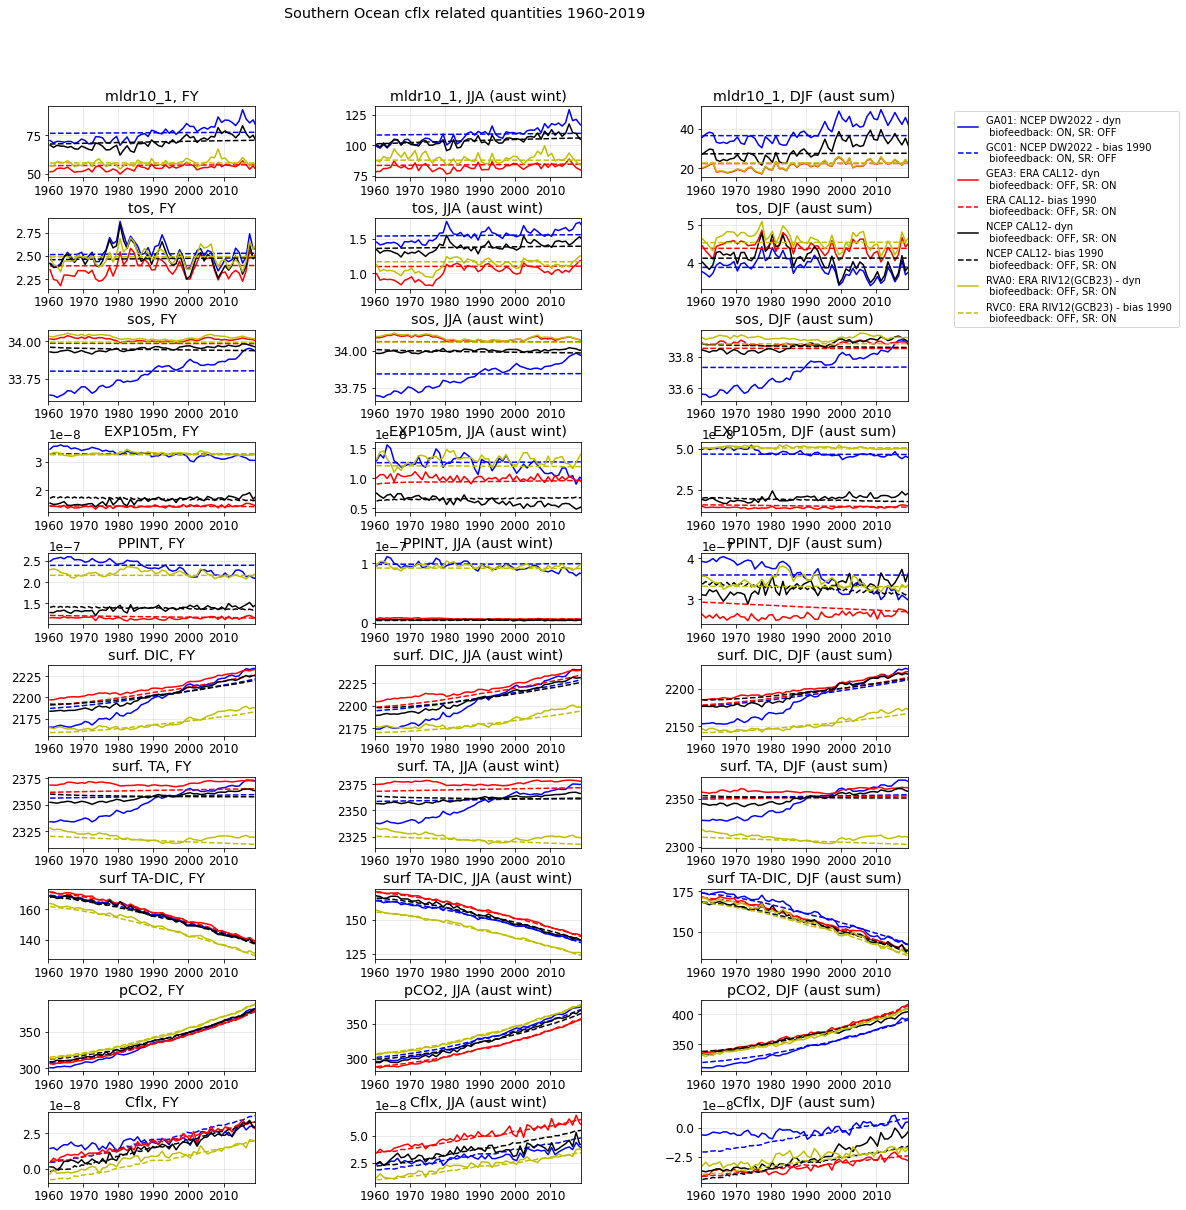

In [24]:
sy = 1960; ey = 2019
fact = 1.1
fig, axs = plt.subplots(10,3, figsize=(14*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scens = ['GNAP','GNA2','GA01']
scens = ['GA01','GC01','GEA3','GECB','GNA2','GNCB','RVA0','RVC0']

for s in range(0,len(scens)):
    plotorig_seas(scens[s],'mldr10_1',0,'gridT',sy,ey,'FY')
    plotorig_seas(scens[s],'mldr10_1',1,'gridT',sy,ey,'JJA')
    plotorig_seas(scens[s],'mldr10_1',2,'gridT',sy,ey,'DJF')
    
    ofs = 3; tvar = 'tos'
    plotorig_seas(scens[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotorig_seas(scens[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotorig_seas(scens[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
   
    ofs = 6; tvar = 'sos'
    plotorig_seas(scens[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotorig_seas(scens[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotorig_seas(scens[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
    
    ofs = 9; tvar = 'EXP105m'
    plotorig_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 12; tvar = 'PPINT'
    plotorig_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 15; tvar = 'surfDIC'
    plotorig_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotorig_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotorig_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)

    ofs = 18; tvar = 'surfTA'
    plotorig_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotorig_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotorig_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)
    
    ofs = 21; 
    plotorig_tadic(scens[s],0+ofs,'diadT',sy,ey,'FY',1)
    plotorig_tadic(scens[s],1+ofs,'diadT',sy,ey,'JJA',1)
    plotorig_tadic(scens[s],2+ofs,'diadT',sy,ey,'DJF',1)    
    
    ofs = 24; tvar = 'pCO2'
    plotorig_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')    
    
    ofs = 27; tvar = 'Cflx'
    plotorig_seas(scens[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas(scens[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas(scens[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
vars = ['mldr10_1','tos','sos','EXP105m','PPINT','surf. DIC','surf. TA','surf TA-DIC','pCO2','Cflx']

for i in range(0,10):
    
    axs[i*3].set_title(f'{vars[i]}, FY')
    axs[i*3+1].set_title(f'{vars[i]}, JJA (aust wint)')
    axs[i*3+2].set_title(f'{vars[i]}, DJF (aust sum)')
    
for i in range(0,30):
#     axs[i].set_xlim([sy,2020])
#     axs[i].set_xticks(np.arange(sy,2040,20))
    axs[i].set_xlim([datetime(sy, 1, 1), datetime(ey, 1, 1)])
    #axs[i].set_xticks(fontsize = 8)

    axs[i].grid(alpha = 0.3)
fig.suptitle(f'Southern Ocean cflx related quantities {sy}-{ey}', y = 0.95)
plt.subplots_adjust(hspace = 0.58 )
plt.subplots_adjust(wspace = 0.58 )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


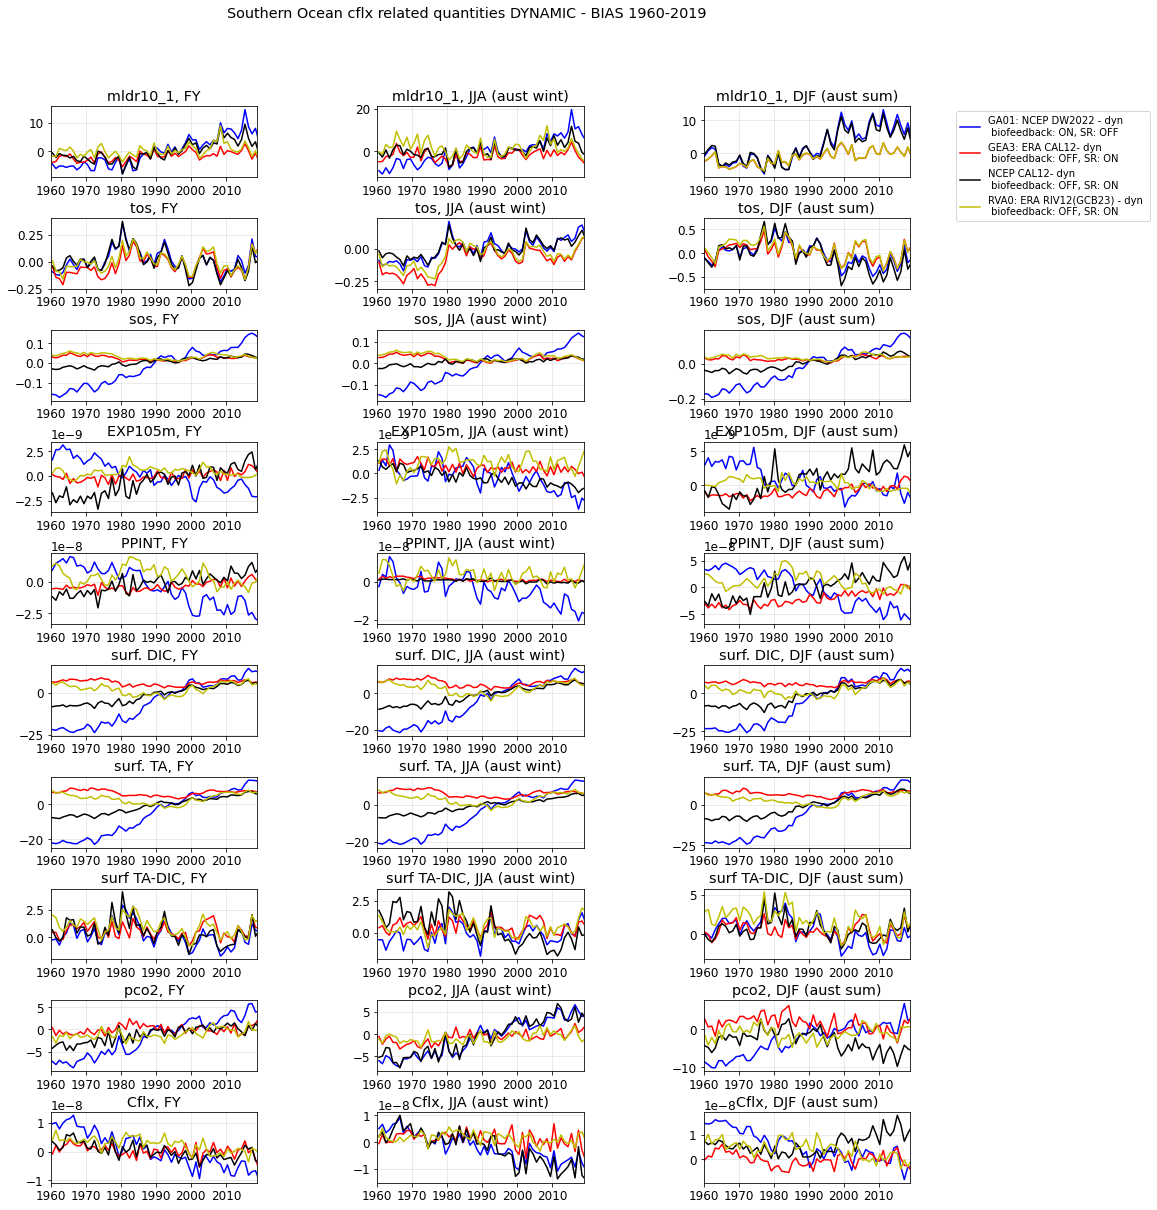

In [25]:
fact = 1.1
fig, axs = plt.subplots(10,3, figsize=(14*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


scens = ['GNAP','GNA2','GA01']
scens = ['GA01','GNA2','GNAW','GNAP','GNAY']
scensC = ['GC01','GNCB','GNCW','GNCP','GNCY']

scens = ['GA01','GEA3','GNA2','RVA0',]
scensC = ['GC01','GECB','GNCB','RVC0']


for s in range(0,len(scens)):
    plotorig_seas_diff(scens[s],scensC[s],'mldr10_1',0,'gridT',sy,ey,'FY')
    plotorig_seas_diff(scens[s],scensC[s],'mldr10_1',1,'gridT',sy,ey,'JJA')
    plotorig_seas_diff(scens[s],scensC[s],'mldr10_1',2,'gridT',sy,ey,'DJF')
    
    ofs = 3; tvar = 'tos'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
   
    ofs = 6; tvar = 'sos'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'gridT',sy,ey,'FY')
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'gridT',sy,ey,'JJA')
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'gridT',sy,ey,'DJF')
    
    ofs = 9; tvar = 'EXP105m'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 12; tvar = 'PPINT'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
    ofs = 15; tvar = 'surfDIC'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)

    ofs = 18; tvar = 'surfTA'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY',1e6)
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA',1e6)
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF',1e6)
    
    ofs = 21; 
    plotorig_tadic_diff(scens[s],scensC[s],0+ofs,'diadT',sy,ey,'FY',1)
    plotorig_tadic_diff(scens[s],scensC[s],1+ofs,'diadT',sy,ey,'JJA',1)
    plotorig_tadic_diff(scens[s],scensC[s],2+ofs,'diadT',sy,ey,'DJF',1)    
    
    ofs = 24; tvar = 'pCO2'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')    
    
    ofs = 27; tvar = 'Cflx'
    plotorig_seas_diff(scens[s],scensC[s],tvar,0+ofs,'diadT',sy,ey,'FY')
    plotorig_seas_diff(scens[s],scensC[s],tvar,1+ofs,'diadT',sy,ey,'JJA')
    plotorig_seas_diff(scens[s],scensC[s],tvar,2+ofs,'diadT',sy,ey,'DJF')
    
vars = ['mldr10_1','tos','sos','EXP105m','PPINT','surf. DIC','surf. TA','surf TA-DIC','pco2','Cflx']

for i in range(0,10):
    
    axs[i*3].set_title(f'{vars[i]}, FY')
    axs[i*3+1].set_title(f'{vars[i]}, JJA (aust wint)')
    axs[i*3+2].set_title(f'{vars[i]}, DJF (aust sum)')
    
for i in range(0,30):
#     axs[i].set_xlim([sy,2020])
#     axs[i].set_xticks(np.arange(sy,2040,20))
    axs[i].set_xlim([datetime(sy, 1, 1), datetime(ey, 1, 1)])
    #axs[i].set_xticks(fontsize = 8)

    axs[i].grid(alpha = 0.3)
fig.suptitle(f'Southern Ocean cflx related quantities DYNAMIC - BIAS {sy}-{ey}', y = 0.95)
plt.subplots_adjust(hspace = 0.58 )
plt.subplots_adjust(wspace = 0.58 )